In [13]:
import os
import json

import pandas as pd
import seaborn as sns

from utils.ir_evaluation import plot_avg_pr_curve, plot_idcg_and_dcg_curve, plot_ndcg_boxplot

In [14]:
# -------------------------------------------------------
#   Init comparisons
# -------------------------------------------------------
# init test collection type
test_collection_type = 'sm' # sm or lg

# init test collection runs
runs = {
    # 'tf-idf': 'tf-idf',
    # 'tf-idf_enhanced': 'tf-idf_enhanced',
    # 'bm25': 'bm25',
    # 'bm25_enhanced': 'bm25_enhanced',
    # 'word2vec': word2vec,
    # 'bert-embedder': 'ckip-pretrained-bert',
}

# init experiments for displaying (with alias)
comparison_experiments = {
    'exp11_ECom-BERT_xbm_batch-hard-loss_train-sm_intent-based-book-neg-2_valid-on-round0-plus': 'cw_best',
    'eCom-BERT': 'eCom_BERT',
}

In [15]:
# -------------------------------------------------------
#   Gather all metrics
# -------------------------------------------------------
all_metrics = {}
# 命名規則: qrels name + collection name
# select test collection ('round0', 'round0-plus', 'round1')
# test_collection = ['round0-original_round0-collection','round0-plus_round0-collection','round0-plus_round0-plus-collection']
test_collection = ['round1']

for test_collection_name in test_collection:
    # runs
    for run_name, run_alias in runs.items():
        run_alias = run_alias + '_' + test_collection_name
        runs_metrics_path = os.path.join('./dataset_process/test_collection_{}/runs'.format('round1'), run_name, 'eval_reports/test_collection_' + test_collection_type, 'metrics.json')
        if os.path.exists(runs_metrics_path):
            with open(runs_metrics_path, 'r', encoding='utf-8') as handle:
                run_metrics = json.load(handle)
            all_metrics[run_alias] = run_metrics
        else: print(run_name, '\nhas no report metrics for test collection (' + test_collection_type + ')! You have to evaluate it!\n')
        
    # experiments
    for exp_name, exp_alias in comparison_experiments.items():
        # if exp_alias == 'intent-based_valid-on-round0-plus' and test_collection_name == 'round0-plus': continue # 遮蔽輸出
        # if exp_alias == 'intent-based_valid-on-round1' and test_collection_name == 'round1': continue # 遮蔽輸出
        exp_alias = exp_alias + '_' + test_collection_name
        exp_metrics_path = os.path.join('./experiments', exp_name, 'eval_reports/{}_test_collection_'.format(test_collection_name) + test_collection_type, 'metrics.json')
        if os.path.exists(exp_metrics_path):
            with open(exp_metrics_path, 'r', encoding='utf-8') as handle:
                exp_metrics = json.load(handle)
            all_metrics[exp_alias] = exp_metrics
        else: print(exp_name, '\nhas no report metrics for test collection (' + test_collection_type + ')! You have to evaluate it!\n')

In [16]:
# # -------------------------------------------------------
# #   change curve order
# # -------------------------------------------------------
# order = [
#     # 'ABRSS + PChome',
#     # 'ABRSS + BM25',
#     'ABRSS',
#     # 'eCom-iris + BM25',
#     # 'e-commerce baseline',
#     'eCom-iris',
#     # 'bm25',
#     # 'tf-idf',
#     # 'dssm',
#     # 'eCom-BERT',
#     # 'ckiplab-bert-base-chinese',  
#     ]

# temp_metrics = {}
# for i in order:
#     name = i + "_" + test_collection[0]
#     temp_metrics[i] = all_metrics[name]
# all_metrics = temp_metrics

In [17]:
# -------------------------------------------------------
#   Metrics
# -------------------------------------------------------
for exp_name, metrics in all_metrics.items():
    print(exp_name)
    print(pd.DataFrame(metrics['metrics']).T)
    print('\n')

cw_best_round1
                        1         5        10        20        50
accuracy@k       0.840637  0.944223  0.964143  0.988048  0.988048
precision@k      0.840637  0.790438  0.754183  0.698805  0.606693
recall@k         0.018960  0.082521  0.141738  0.228078  0.406546
ndcg@k           0.840637  0.800803  0.775628  0.742326  0.722211
3-levels-ndcg@k  0.860558  0.831563  0.810793  0.780461  0.752988
mrr@k            0.840637  0.881541  0.884473  0.886111  0.886111
map@k            0.840637  0.750204  0.703233  0.646431  0.596873


eCom_BERT_round1
                        1         5        10        20        50
accuracy@k       0.498008  0.741036  0.808765  0.856574  0.900398
precision@k      0.498008  0.447809  0.420319  0.393625  0.370996
recall@k         0.008552  0.035114  0.063177  0.107294  0.227327
ndcg@k           0.498008  0.458783  0.436047  0.415973  0.421087
3-levels-ndcg@k  0.552457  0.514215  0.491601  0.475193  0.474587
mrr@k            0.498008  0.592231  0.601

In [18]:
preformance_comparison ={
    'baseline': 'eCom_BERT_round1',
    'experiment': 'cw_best_round1',
}
baseline_metrics = pd.DataFrame(all_metrics[preformance_comparison['baseline']]['metrics'])
experiment_metrics = pd.DataFrame(all_metrics[preformance_comparison['experiment']]['metrics'])
metrics_gap = experiment_metrics - baseline_metrics
metrics_gap = metrics_gap.rename(columns={x:f' {x}' for x in metrics_gap.columns.to_list()}).T
print('+-----------------------------------------------------------------+')
print("baseline:", preformance_comparison['baseline'])
print("experiment:", preformance_comparison['experiment'])
print(metrics_gap)
print('+-----------------------------------------------------------------+')

+-----------------------------------------------------------------+
baseline: eCom_BERT_round1
experiment: cw_best_round1
                         1         5        10        20        50
 accuracy@k       0.342629  0.203187  0.155378  0.131474  0.087649
 precision@k      0.342629  0.342629  0.333865  0.305179  0.235697
 recall@k         0.010408  0.047407  0.078561  0.120783  0.179218
 ndcg@k           0.342629  0.342020  0.339581  0.326353  0.301123
 3-levels-ndcg@k  0.308101  0.317347  0.319192  0.305268  0.278401
 mrr@k            0.342629  0.289309  0.282876  0.280988  0.279399
 map@k            0.342629  0.367508  0.371745  0.354402  0.321960
+-----------------------------------------------------------------+


In [19]:
# -------------------------------------------------------S
#   Plot averaged precision recall curve
# -------------------------------------------------------
# build precisions dict
precisions_dict = {}
for exp_name, metrics in all_metrics.items():
    precisions_dict[exp_name] = metrics['interpolated-precisions']

# plot
sns.set_palette(sns.color_palette([
    '#E31A1C', # red
    '#1F78B4', # blue
    '#FF7F00', # orange
    '#33A02C', # green
    '#6A3D9A', # purple
    '#96de57',
    '#CAB2D6',
    '#75bbe0',
    '#FDBF6F',
    '#FB9A99',

    # '#FF0000', #- 紅色
    '#FF8000', #- 橘紅色
    '#FFFF00', #- 純黃色
    '#80FF00', #- 黃綠色
    '#00FF00', #- 純綠色
    '#00FF80', #- 青綠色
    '#00FFFF', #- 青色
    '#0080FF', #- 藍綠色
    '#0000FF', #- 純藍色
    '#8000FF', #- 紫藍色
    '#FF00FF', #- 純紫色
    '#FF0080', #- 粉紅紅色
    
]))


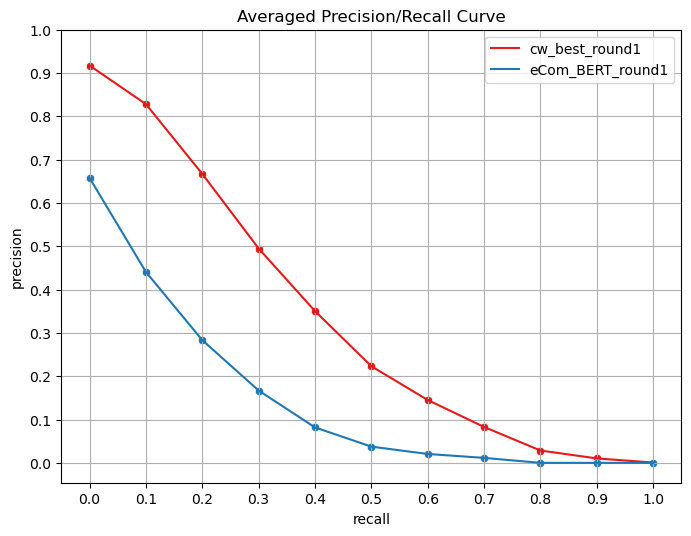

In [20]:
plot_avg_pr_curve(
    precisions_dict=precisions_dict
)

In [21]:
def area_under_curve(interpolated_precisions):
    area = 0
    mean_interp_dict = {}

    interp_recalls = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0]
    for i in range(len(interp_recalls)):
        mean_interp_dict[interp_recalls[i]] = interpolated_precisions[i]
    

    for i in range(len(interp_recalls)-1):
        a = mean_interp_dict[interp_recalls[i]]
        b = mean_interp_dict[interp_recalls[i+1]]
        area += (a+b) * 0.1/2


    return area

In [22]:
print('AUC (Area Under Curve)')
for exp_name, metrics in all_metrics.items():
    interpolated_precisions = metrics['interpolated-precisions']    
    print(exp_name, ':', round(area_under_curve(interpolated_precisions), 5))

AUC (Area Under Curve)
cw_best_round1 : 0.3289
eCom_BERT_round1 : 0.13709


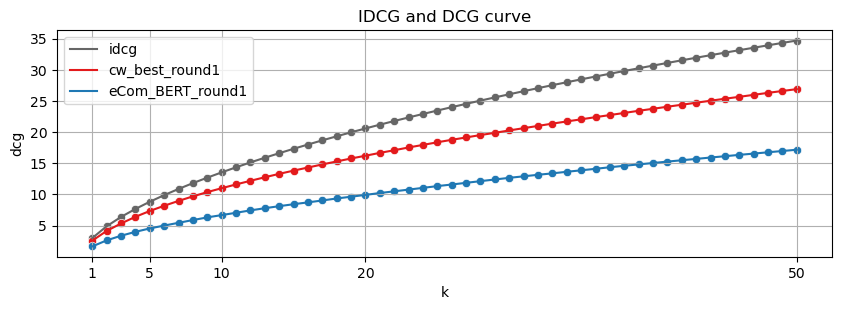

In [23]:
# -------------------------------------------------------
#   Plot IDCG and DCG curve
# -------------------------------------------------------
# build IDCG and DCGs dict
idcg_and_dcgs_dict = {}
for i, (exp_name, metrics) in enumerate(all_metrics.items()):
    if i == 0: idcg_and_dcgs_dict['idcg'] = metrics['idcg_and_dcg_points']['idcg']
    idcg_and_dcgs_dict[exp_name] = metrics['idcg_and_dcg_points']['dcg']
sns.set_palette(sns.color_palette([
    # '#666666',
    # # '#33A02C', # green
    # # '#96de57',
    # # '#6A3D9A', # purple
    # # '#CAB2D6'
    # '#1F78B4', # blue
    # # '#75bbe0',
    # # '#FF7F00', # orange
    # # '#FDBF6F',
    # '#E31A1C', # red
    # '#FB9A99',

    '#666666',
    '#E31A1C', # red
    '#1F78B4', # blue
    '#FF7F00', # orange
    '#33A02C', # green
    '#6A3D9A', # purple
    '#96de57',
    '#CAB2D6',
    '#75bbe0',
    '#FDBF6F',
    '#FB9A99',

    # '#FF0000', #- 紅色
    '#FF8000', #- 橘紅色
    '#FFFF00', #- 純黃色
    '#80FF00', #- 黃綠色
    '#00FF00', #- 純綠色
    '#00FF80', #- 青綠色
    '#00FFFF', #- 青色
    '#0080FF', #- 藍綠色
    '#0000FF', #- 純藍色
    '#8000FF', #- 紫藍色
    '#FF00FF', #- 純紫色
    '#FF0080', #- 粉紅紅色
]))
plot_idcg_and_dcg_curve(
    idcg_and_dcgs_dict=idcg_and_dcgs_dict,
)